# Finding Symbolic Defaults

We have two answer to questions:
 1. **By which method can we find good Symbolic Defaults? And what are they?**
 2. Can we find good (i.e. better than currently known) symbolic defaults?
 
This notebook addresses the first question.

**important**: Currently specifically the notebook only addresses the second part of the first question.

---

## 1.1 Looking at the evolutionary optimization
The following operators were considered:
 - unary: `expit, neg`
 - binary: `add, sub, mul, div, pow, max, min`
 
The following inputs were considered:
 - m: number of classes
 - p: number of features
 - n: number of instances
 - mkd: median kernel distance (todo: add link)
 - mcp: majority class ratio (`majority class count / n`)
 - rc: ratio of symbolic features (`number of symbolic features / p`)
 - xvar: variance as calculated on the full data as if it was a single sequence (used in the scikit-learn 0.22 default).
 - random constants:
     - random choice of {2^i | i int from [-8, .., 8]}
     - random choice of an int in [1, 10]
     - random choice of float in [0, 1]
     
The symbolic defaults were optimized together.

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from visualization.output_parser import parse_console_output
results = parse_console_output("data/results/opt_svc_after_pre.txt")#"D:\\data/symb_def_svc_100_20_prog.txt")

The following plots show the internal fitness score. The internal fitness score is the average of scores predicted by the surrogate model across all tasks except the indicated one.

In [28]:
def plot_result(result, ax):    
    max_score_per_gen = [float(gen.score_max) for gen in result.information_by_generation]
    ax.plot(range(result.n_generations_elapsed), max_score_per_gen)
    ax.set_ylim([0.75, 1.])
    ax.set_xlim([0, 100])
    ax.set_title(result.task)

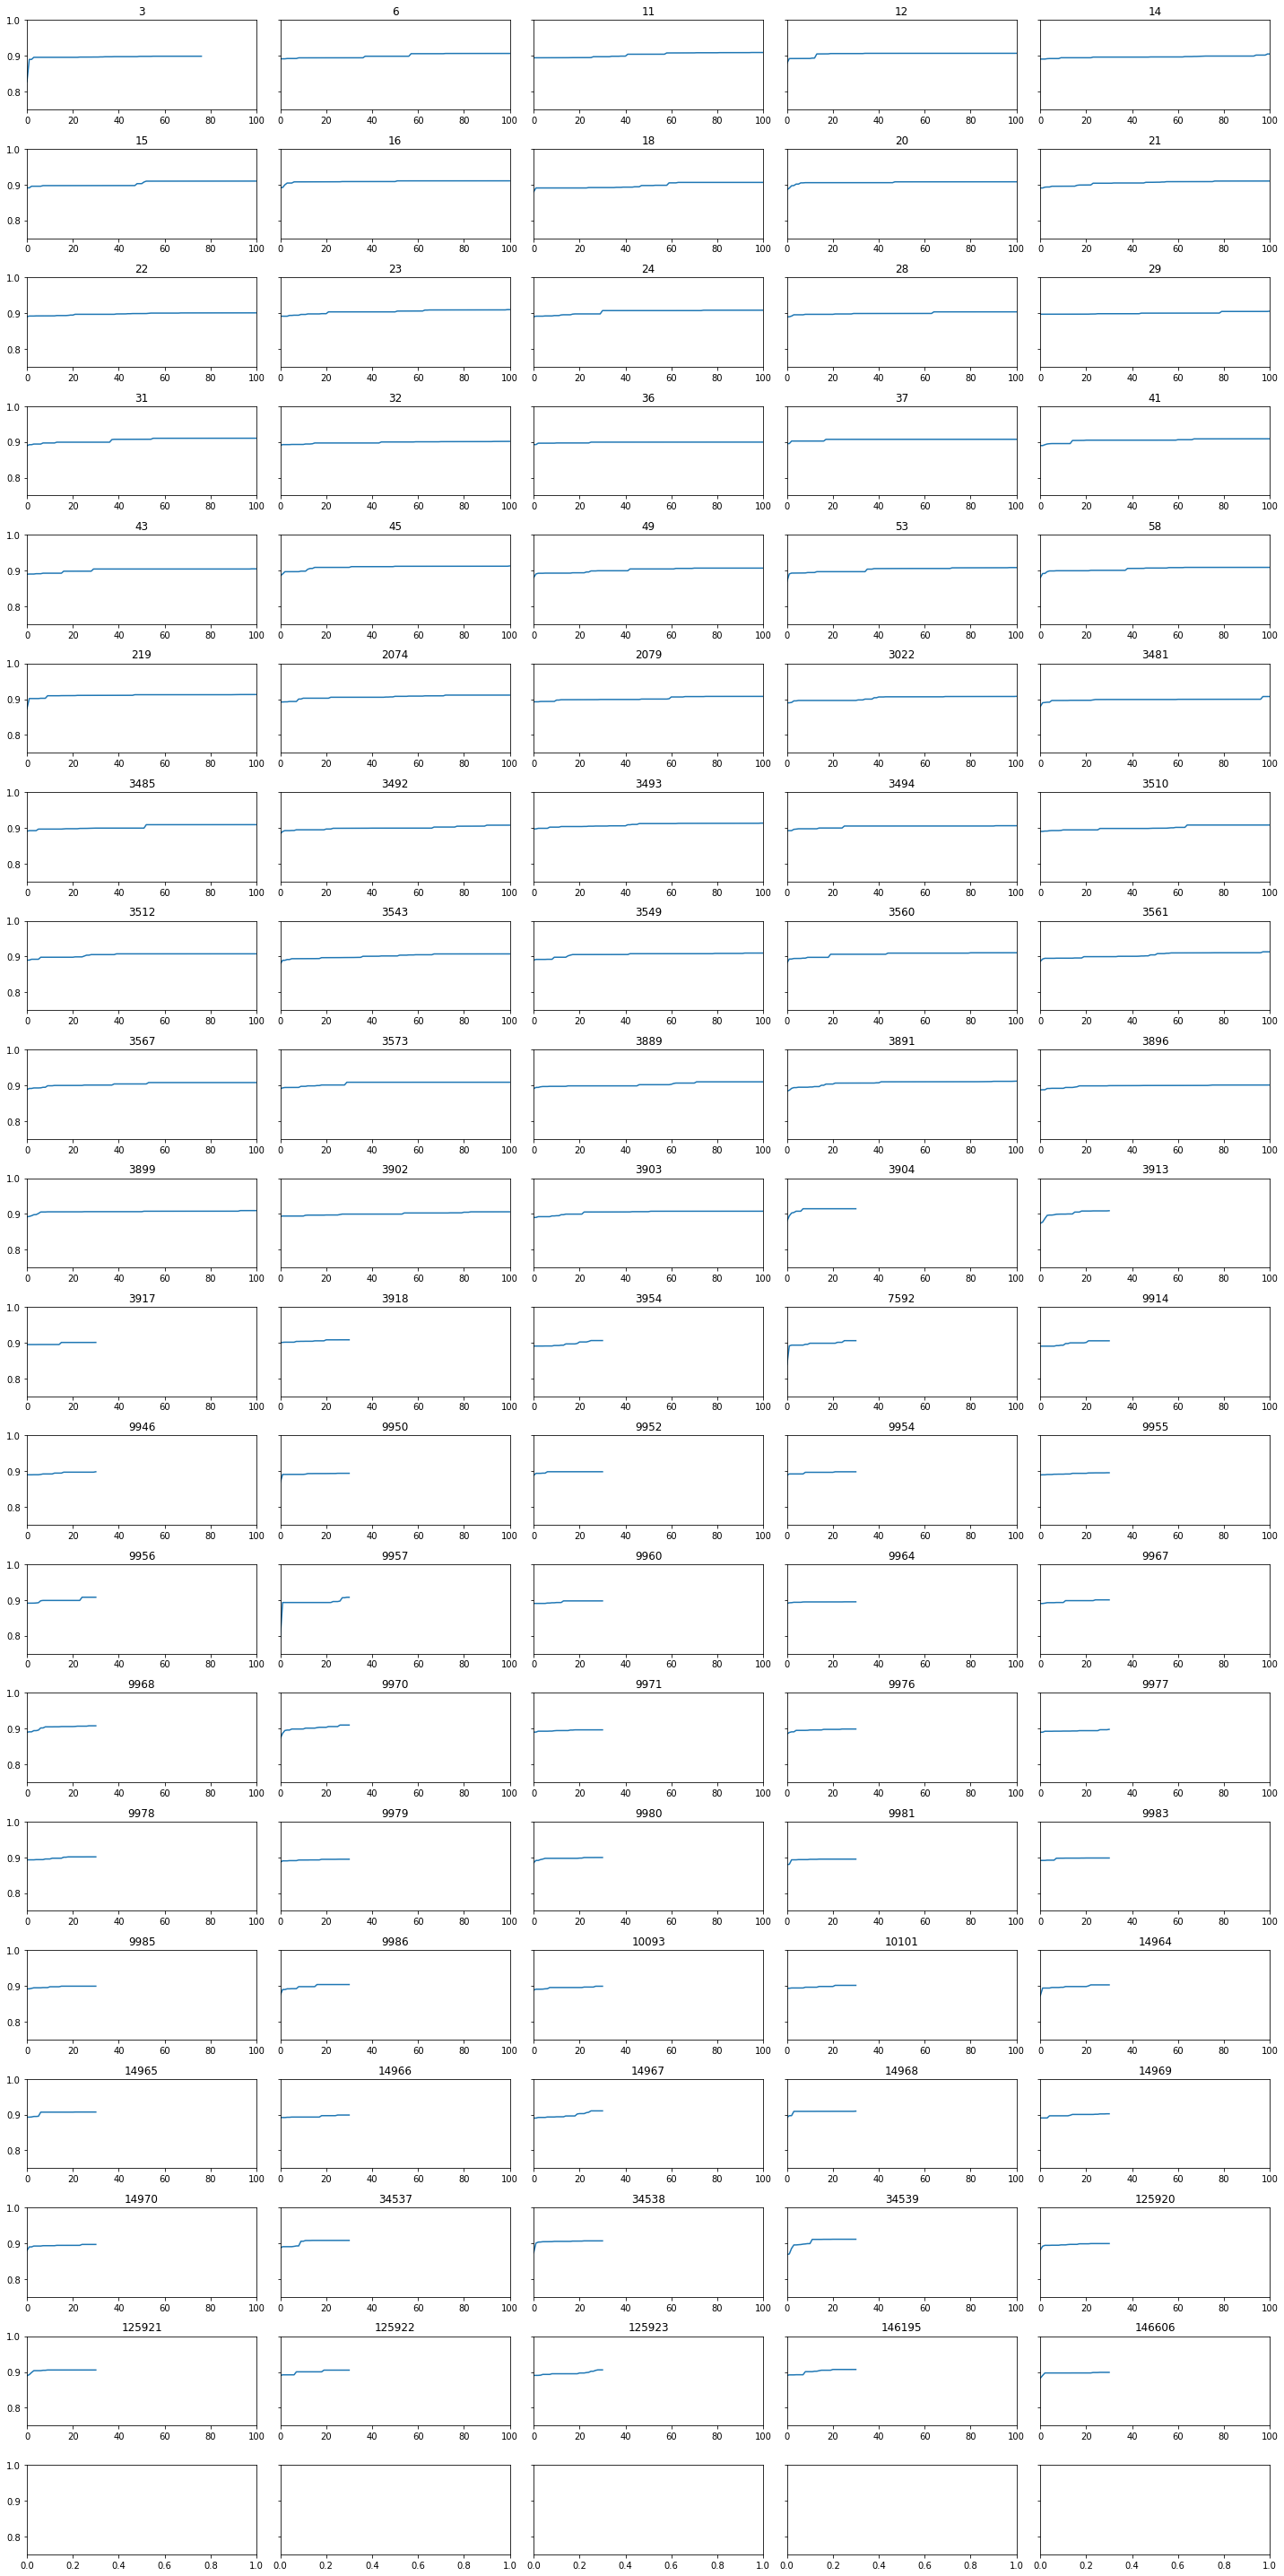

In [29]:
n_rows, n_cols = 20, 5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 40), sharey=True)
for i, result in enumerate(results):
    ax = axes[i//n_cols, i % n_cols]
    plot_result(result, ax)
fig.tight_layout()

The top scoring expressions per task. Overall:

In [5]:
for result in results:
    print(result.task, result.top_five_expressions[0])

3 p, truediv(mkd, 4.0)
6 32.0, truediv(mkd, 4.0)
11 truediv(p, mcp), mul(0.22741145537539598, mkd)
12 add(truediv(n, p), p), mul(mkd, 0.22511679513073424)
14 truediv(10.0, mcp), mul(mkd, 0.23213547632124398)
15 128.0, truediv(mkd, 4.0)
16 mul(add(8.0, mul(4.0, 4.0)), m), mul(0.23107794139992588, mkd)
18 sub(sub(128.0, expit(128.0)), mul(mul(128.0, mcp), mcp)), mul(add(0.00390625, 0.2227244515510528), mkd)
20 pow(add(add(64.0, add(64.0, m)), m), expit(p)), truediv(mkd, 5.0)
21 add(m, mul(m, 10.0)), mul(mkd, 0.25)
22 mul(64.0, 0.8788816065809125), mul(mkd, 0.25)
23 128.0, truediv(mkd, add(add(0.41163256861675235, rc), add(rc, 4.0)))
24 truediv(n, 8.0), truediv(mkd, 5.0)
28 add(add(truediv(n, add(p, m)), add(m, mkd)), m), mul(0.2257766546491321, mkd)
29 128.0, truediv(mkd, add(truediv(rc, mul(mcp, mkd)), 4.0))
31 truediv(p, mcp), mul(mkd, 0.2487665327858929)
32 mul(n, mul(sub(m, mul(0.9531655474022283, mcp)), mkd)), mul(0.0025292618482459783, 0.6258857694987314)
36 64.0, mul(0.23290664385

Expressions in the pareto-front with the least amount of operators:

In [25]:
for result in results:
    _, expr = min([(len(expr.split('(')), expr) for expr in result.top_five_expressions])
    print(result.task, expr)

3 truediv(16.0, min(mcp, xvar)), mkd
6 128.0, mul(0.2528090655663805, mkd)
11 add(add(pow(256.0, max(0.8383052945660727, mcp)), m), 16.0), truediv(mkd, add(rc, sub(4.0, mkd)))
12 mul(64.0, m), mul(0.835190535597792, mul(mkd, max(0.27683002446272653, mkd)))
14 mul(64.0, m), truediv(mkd, 4.0)
15 mul(add(pow(0.8511350104740928, xvar), rc), 64.0), mul(mkd, max(0.2526291775971512, mkd))
16 128.0, mul(mkd, max(0.24603754384179743, mul(m, mkd)))
18 128.0, mul(mkd, 0.25)
20 truediv(sub(64.0, xvar), 0.503225355026711), mul(mkd, 0.25)
21 128.0, mul(mul(mkd, expit(pow(0.03125, mcp))), expit(mul(0.03125, mkd)))
22 128.0, mul(mul(mkd, 0.015625), 16.0)
23 add(128.0, m), truediv(mkd, sub(6.0, add(sub(2.0, rc), mkd)))
24 max(128.0, pow(16.0, pow(16.0, mkd))), mul(mkd, max(mkd, 0.21502227662478635))
28 256.0, mul(mkd, 0.2978977185387355)
29 truediv(truediv(16.0, mcp), xvar), mul(0.3760191856305214, mkd)
31 add(64.0, add(64.0, truediv(xvar, mcp))), mul(0.25, mkd)
32 truediv(16.0, min(xvar, mcp)), truedi

----
**note**: Everything below is scratchpad and should be ignored

----